In [1]:
import pandas
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
from functools import reduce
import math

In [2]:
names = pd.read_csv('/datasets/project_sql_result_01.csv')
names.info()
names.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


Flash Cab is number one company by a longshot. No missing values.

In [3]:
neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
neighborhoods.info()
neighborhoods.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


People like to travel to Loop a lot. No missing values here.

In [4]:
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')
loop_ohare.info()
loop_ohare.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [5]:
loop_ohare['duration_seconds'].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

No missing values here. Very random amount of times for the same trip. There was a maximum trip that took 7440 seconds and one trip took 0 seconds. The data is not exactly very good for us. The taxi didn't start? Was it a round trip fro the max?

### Changing Data types

In [6]:
neighborhoods['average_trips']=neighborhoods['average_trips'].astype('int')

Changed data type so easier to make a query later

### Identify the top 10 neighborhoods in terms of drop-offs

In [7]:
neighborhoods.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


In [8]:
Top10_neighborhoods=neighborhoods.query('average_trips >= 1259.')

 Prepared the data in order to make the graph 

## Taxi Companies and number of rides

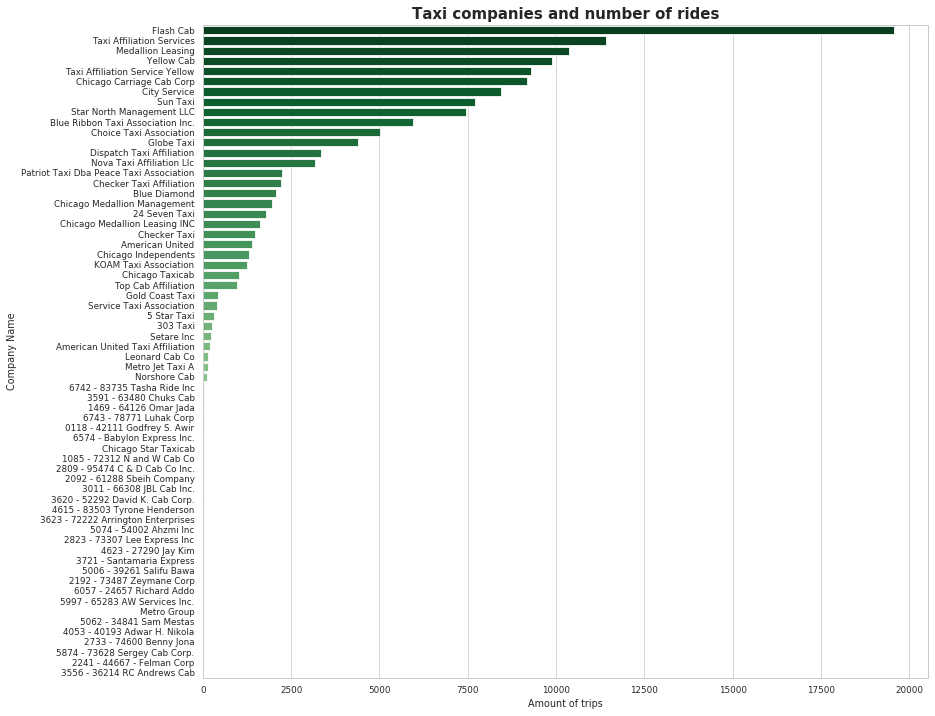

In [9]:
sns.set_context('paper')
sns.set_style('whitegrid')

plt.figure(figsize=(13,12))

sns.barplot(x= 'trips_amount', y='company_name', data=names, palette='Greens_r')

plt.title('Taxi companies and number of rides', fontsize=15, fontweight='bold')
plt.ylabel('Company Name')
plt.xlabel('Amount of trips')
plt.show()

### Conclusion

Flash Cab has the most trips by far close to 20000. There are at least half the companies that we have no data on them or they do not make any trips and are not functioning anymore.

## Top 10 neighborhoods by number of dropoffs

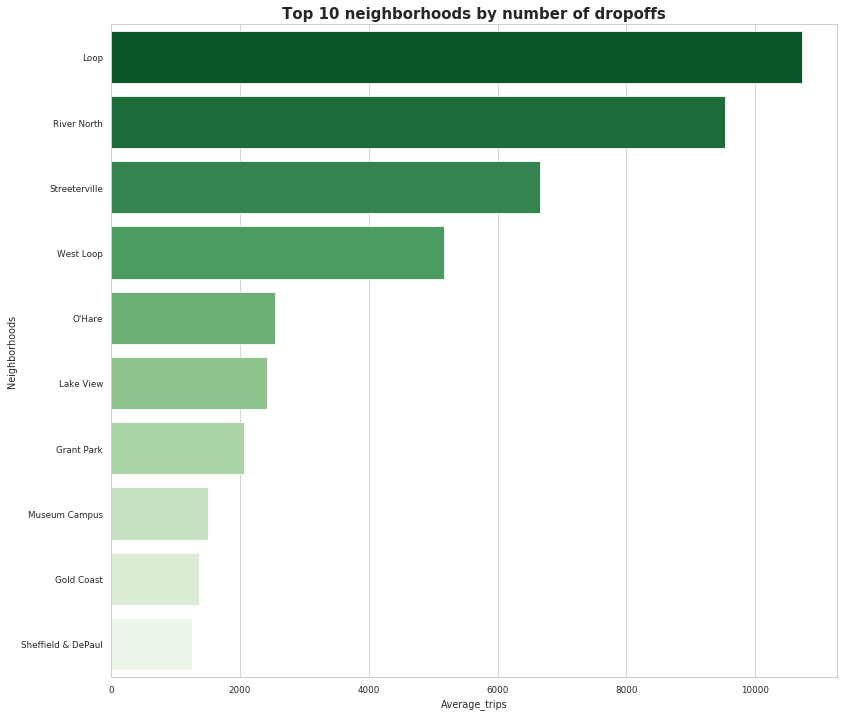

In [10]:
sns.set_context('paper')
sns.set_style('whitegrid')

plt.figure(figsize=(13,12))

sns.barplot(x= 'average_trips', y='dropoff_location_name', data=Top10_neighborhoods, palette='Greens_r')

plt.title('Top 10 neighborhoods by number of dropoffs', fontsize=15, fontweight='bold')
plt.ylabel('Neighborhoods')
plt.xlabel('Average_trips')
plt.show()

### Conclusion

Loop is the most frequented neighborhood with over 10000 average trips. Most average_trips fall below 6000.

## Test the hypothesis:

In [11]:
rain=loop_ohare.query('weather_conditions == "Bad"')
shine=loop_ohare.query('weather_conditions == "Good"')

In [12]:
shine

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0


In [13]:
shine['duration_seconds'].describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [14]:
rain

,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,Bad,2969.0
30,2017-11-18 12:00:00,Bad,1980.0
34,2017-11-04 17:00:00,Bad,2460.0
51,2017-11-04 16:00:00,Bad,2760.0
52,2017-11-18 12:00:00,Bad,2460.0
...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0
1032,2017-11-18 10:00:00,Bad,1908.0
1053,2017-11-18 12:00:00,Bad,2400.0
1061,2017-11-18 16:00:00,Bad,2186.0


In [15]:
rain['duration_seconds'].describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

Good means there was no rain in weather_conditions and bad means that there was rain. Only have 180 days for rain and 888 days for sunshine. But you can see more than 50% of the rain days are in the 2000 whereas 50% of non rain days are less than 2000. And the Shine data has the longer duration of 7440.

Split the data of the Loop to O'hare International Airport between the days that did not have rain and the days that were raining. I will use these two separate tables to determine if there is a change in average duration of rides.
 
My null hypothesis is that the average duration of rides from these locations on Saturdays without rain does not change from the average duration on days when there is rain.
 
My alternative hypothesis will be that the average duration does change on rainy Saturdays.

In [16]:
# Testing hypothesis of: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

list_rain = rain['duration_seconds']
list_shine = shine['duration_seconds']

alpha = 0.05 

results = results = st.ttest_ind(list_rain, list_shine)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  6.517970327099473e-12
We reject the null hypothesis


### Conclusion

There is a difference between the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays and Saturdays that are not rainy. The average duration does change on rainy Saturdays. 

## General Conclusion

The Loop neighborhood is the most popular neighborhood to travel to. Flash Cab is the most popular company to use. 
Rain does make a difference in the amount of time that the trip will take for the cab company from Loop to O'Hare International though the longest trip was taken on a regular sunny day.

There are a lot of taxi companies that have no data or are defunct.